In [879]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [880]:
df=pd.read_csv('Bank - Bank_Marketing.csv.csv')

In [881]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [883]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [884]:
df2=df.copy()

In [885]:
df2['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [886]:
cat = []
num = []
for c in df.columns:
    if df2[c].dtype == 'object':
        cat.append(c)
    else:
        num.append(c)
print(cat)      
print(num) 

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [887]:
df2[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [888]:
df2[cat].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [889]:
for i in cat:
    # df[i]=df[i].astype('object')
    df2_mapping = {df2: i for i, df2 in enumerate(df2[i].unique())} # creates a dictionary mapping
    df2[i] = df2[i].map(df2_mapping)
    # df2[i]=df2[i].astype('object')

In [890]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

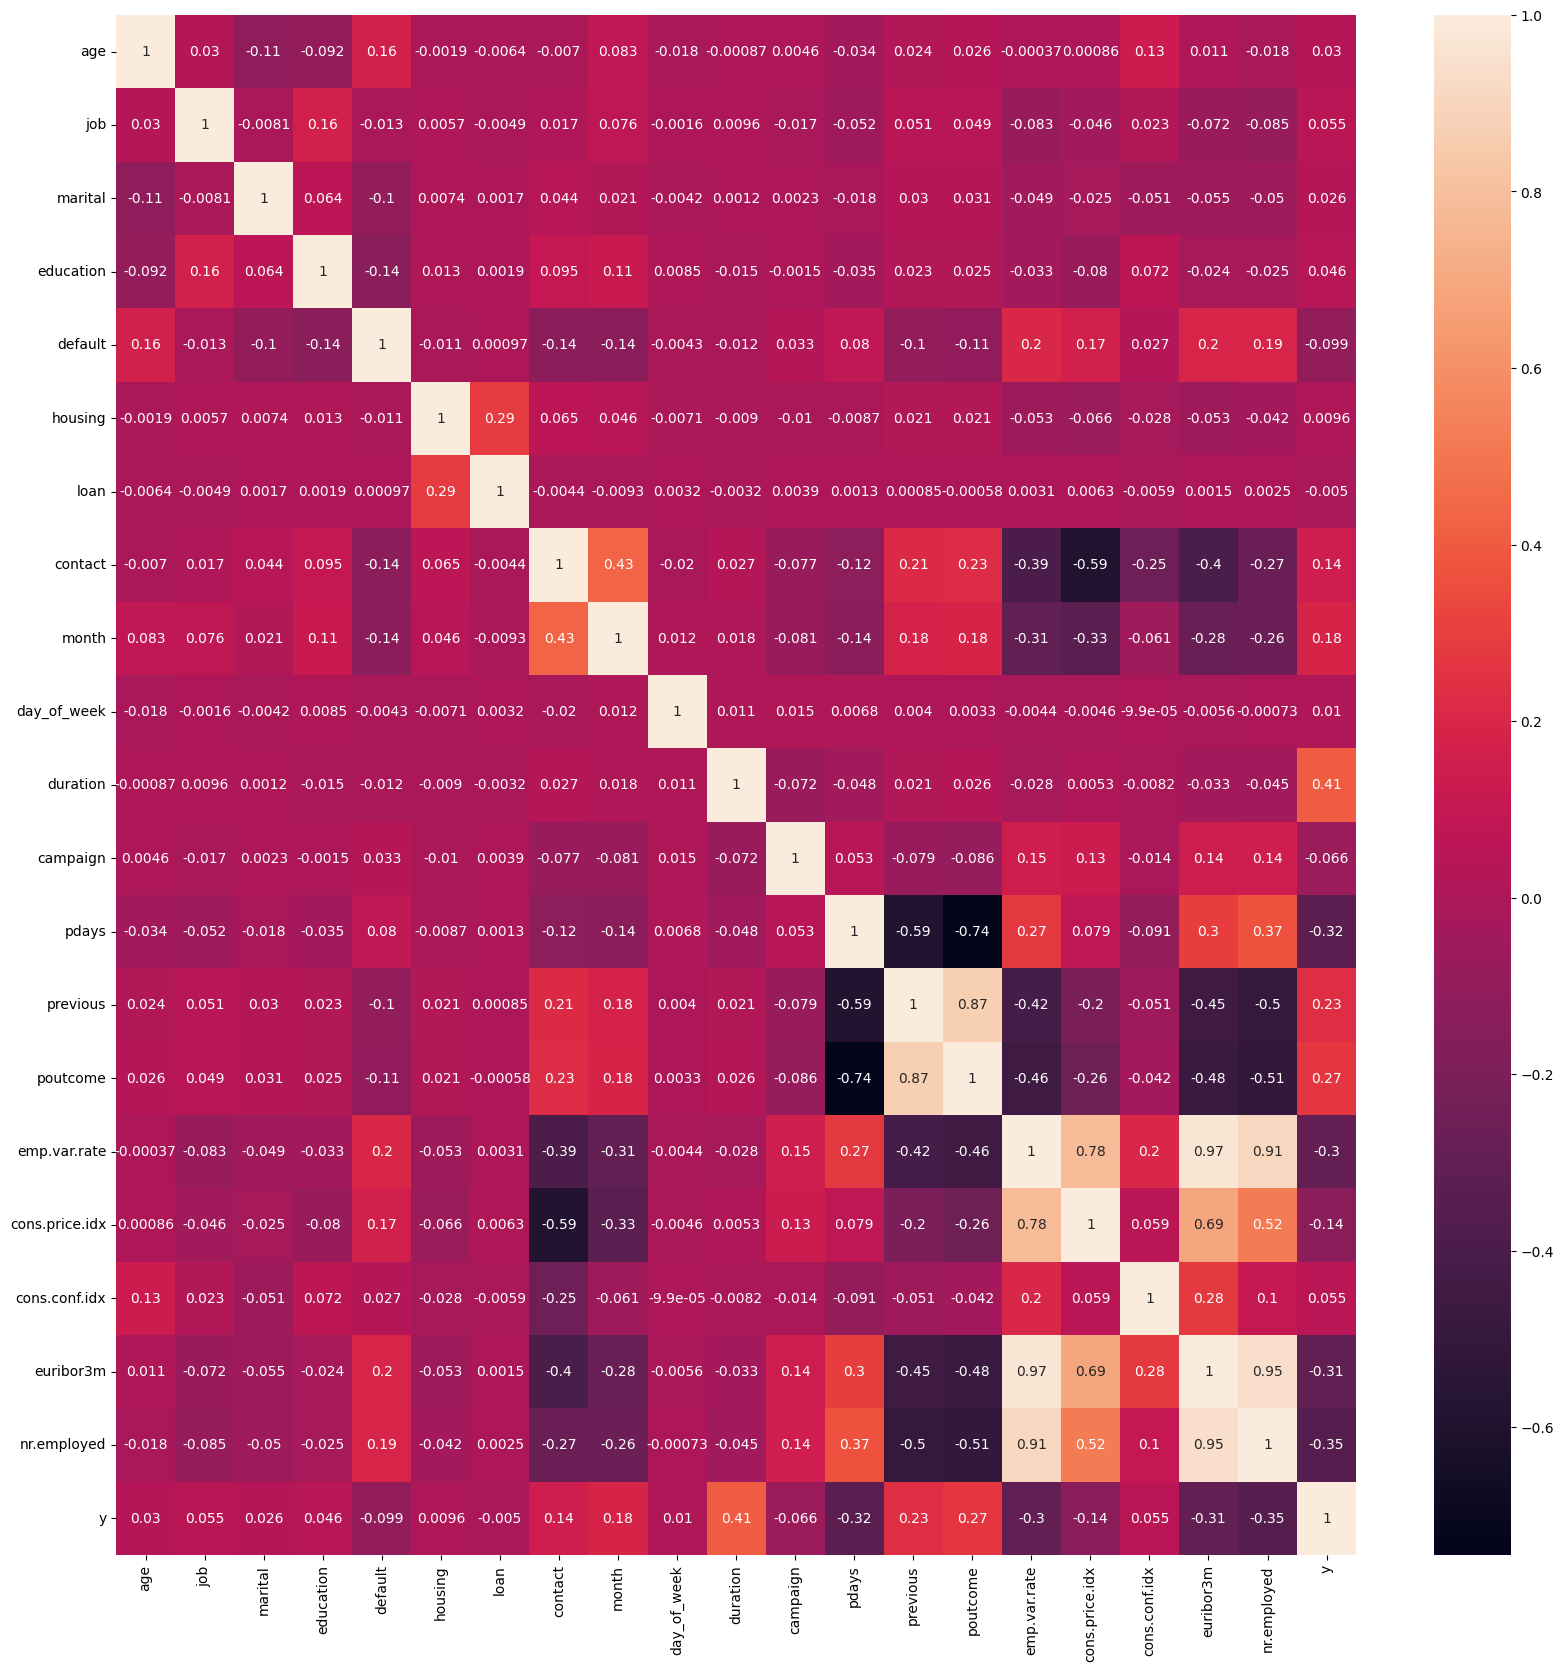

In [891]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [892]:
df2.drop(['poutcome','euribor3m','emp.var.rate','duration'],axis=1,inplace=True)

In [893]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(3), int64(14)
memory

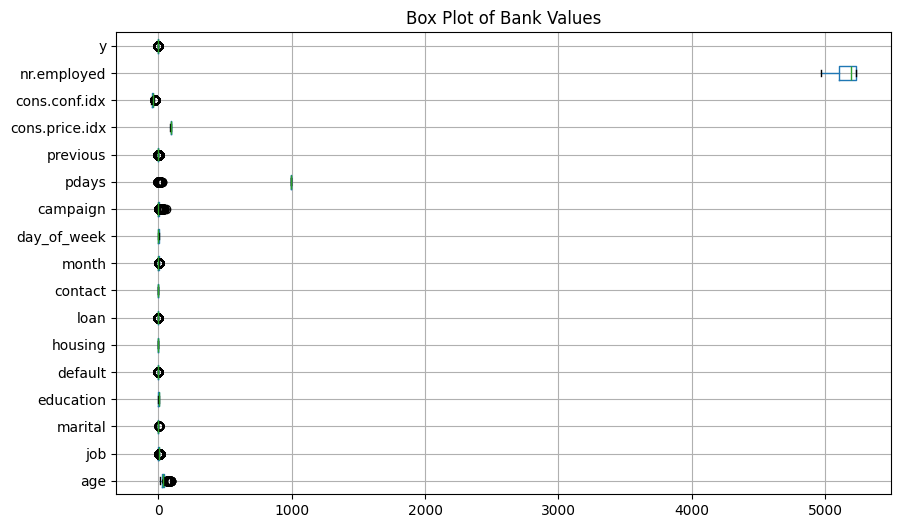

In [894]:
plt.figure(figsize=(10, 6))
df2.boxplot(vert=0)
plt.title('Box Plot of Bank Values')
plt.show()

In [895]:
def remove_outlier(col):
    sorted(col)
    q1,q3=np.percentile(col,[25,75]) 
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    return ul,ll

In [896]:
df2_out=df2.copy()
df2_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
dtypes: float64(3), int64(14)
memory

In [897]:
for c in df2_out.columns:
    if c != 'y':
        ul,ll = remove_outlier(df2_out[c])
        df2_out[c] = np.where(df2_out[c]>ul,ul,df2_out[c])
        df2_out[c] = np.where(df2_out[c]<ll,ll,df2_out[c])
    

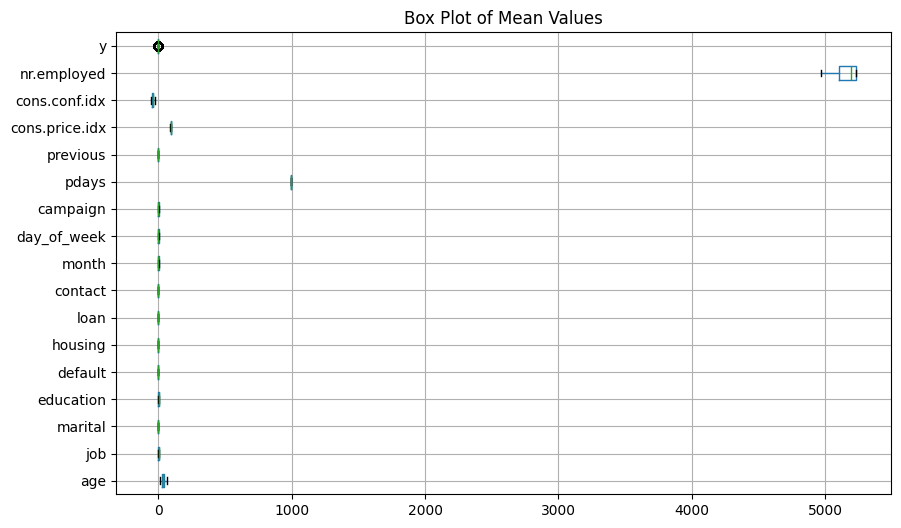

In [898]:
plt.figure(figsize=(10, 6))
df2_out.boxplot(vert=0)
plt.title('Box Plot of Mean Values')
plt.show()

In [899]:
from sklearn.preprocessing import StandardScaler

In [900]:
columns_to_scale = ['pdays','age','cons.price.idx','cons.conf.idx','nr.employed']  # Specify numeric columns
scaler = StandardScaler()
df2_out[columns_to_scale] = scaler.fit_transform(df2_out[columns_to_scale])


In [901]:
df2[columns_to_scale]

,pdays,age,cons.price.idx,cons.conf.idx,nr.employed
0,999,56,93.994,-36.4,5191.0
1,999,57,93.994,-36.4,5191.0
2,999,37,93.994,-36.4,5191.0
3,999,40,93.994,-36.4,5191.0
4,999,56,93.994,-36.4,5191.0
...,...,...,...,...,...
41183,999,73,94.767,-50.8,4963.6
41184,999,46,94.767,-50.8,4963.6
41185,999,56,94.767,-50.8,4963.6
41186,999,44,94.767,-50.8,4963.6


In [902]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,1,999,0,93.994,-36.4,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,1,999,0,93.994,-36.4,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,1,999,0,93.994,-36.4,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,1,999,0,93.994,-36.4,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,1,999,0,93.994,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,1,999,0,94.767,-50.8,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,1,999,0,94.767,-50.8,4963.6,0
41185,56,5,0,6,0,1,0,1,5,4,2,999,0,94.767,-50.8,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,1,999,0,94.767,-50.8,4963.6,1


In [903]:
df2['job'].nunique()

12

In [904]:
x = df2.drop('y',axis=1)
y = df2['y']


In [905]:
x.value_counts()

age  job  marital  education  default  housing  loan  contact  month  day_of_week  campaign  pdays  previous  cons.price.idx  cons.conf.idx  nr.employed
27   2    1        1          0        0        0     1        2      1            1         999    0         93.918          -42.7          5228.1         7
28   1    0        1          0        0        0     1        2      1            1         999    0         93.918          -42.7          5228.1         7
                                       1        0     1        2      1            1         999    0         93.918          -42.7          5228.1         6
43   0    0        0          0        1        0     1        2      2            1         999    0         93.918          -42.7          5228.1         6
35   2    0        6          0        1        0     1        5      2            1         999    0         93.200          -42.0          5195.8         6
                                                         

In [906]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [907]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [908]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [909]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [910]:
y_pred = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(DT_model.score)
print()
print(metrics.confusion_matrix(y_train, y_pred))
print()
print(metrics.classification_report(y_train, y_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[29239     6]
 [  188  3517]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29245
           1       1.00      0.95      0.97      3705

    accuracy                           0.99     32950
   macro avg       1.00      0.97      0.98     32950
weighted avg       0.99      0.99      0.99     32950



In [911]:
y_test_pred = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(DT_model.score)
print()
print(metrics.confusion_matrix(y_test, y_test_pred))
print()
print(metrics.classification_report(y_test, y_test_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[6578  725]
 [ 647  288]]

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.28      0.31      0.30       935

    accuracy                           0.83      8238
   macro avg       0.60      0.60      0.60      8238
weighted avg       0.84      0.83      0.84      8238



In [912]:
columns_to_scale = ['pdays','age','cons.price.idx','cons.conf.idx','nr.employed']  # Specify numeric columns
scaler = StandardScaler()
df2_out[columns_to_scale] = scaler.fit_transform(df2_out[columns_to_scale])

In [913]:
# df2_out[columns_to_scale]

In [914]:
df2_out

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,1.585559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.722722,0.886869,0.331680,0
1,1.684283,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.722722,0.886869,0.331680,0
2,-0.290198,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.722722,0.886869,0.331680,0
3,0.005974,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.722722,0.886869,0.331680,0
4,1.585559,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.722722,0.886869,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.918334,5.0,0.0,4.0,0.0,1.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0,2.058168,-2.225602,-2.815697,1
41184,0.598319,3.0,0.0,4.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0,2.058168,-2.225602,-2.815697,0
41185,1.585559,5.0,0.0,6.0,0.0,1.0,0.0,1.0,5.0,4.0,2.0,0.0,0.0,2.058168,-2.225602,-2.815697,0
41186,0.400870,4.0,0.0,4.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0,2.058168,-2.225602,-2.815697,1


In [915]:
x = df2_out.drop('y',axis=1)
y = df2_out['y']

In [916]:
x.value_counts()

age        job  marital  education  default  housing  loan  contact  month  day_of_week  campaign  pdays  previous  cons.price.idx  cons.conf.idx  nr.employed
-1.079990  2.0  1.0      6.0        0.0      1.0      0.0   1.0      3.0    4.0          1.0       0.0    0.0       -0.227465        0.951712       0.845170      9
-0.685094  2.0  0.0      6.0        0.0      1.0      0.0   1.0      3.0    4.0          1.0       0.0    0.0       -0.227465        0.951712       0.845170      9
 1.585559  7.0  0.0      6.0        0.0      0.0      0.0   1.0      7.5    3.0          1.0       0.0    0.0       -0.864955       -1.425870      -0.940281      8
-0.487646  4.0  1.0      4.0        0.0      1.0      0.0   1.0      3.0    3.0          1.0       0.0    0.0       -0.227465        0.951712       0.845170      8
-1.178714  1.0  0.0      1.0        0.0      0.0      0.0   1.0      2.0    1.0          1.0       0.0    0.0        0.591424       -0.474837       0.845170      8
                     

In [917]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [918]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [919]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [920]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [921]:
y_pred = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(DT_model.score)
print()
print(metrics.confusion_matrix(y_train, y_pred))
print()
print(metrics.classification_report(y_train, y_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[29227    18]
 [  415  3290]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29245
           1       0.99      0.89      0.94      3705

    accuracy                           0.99     32950
   macro avg       0.99      0.94      0.97     32950
weighted avg       0.99      0.99      0.99     32950



In [922]:
y_test_pred = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(DT_model.score)
print()
print(metrics.confusion_matrix(y_test, y_test_pred))
print()
print(metrics.classification_report(y_test, y_test_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[6615  688]
 [ 647  288]]

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7303
           1       0.30      0.31      0.30       935

    accuracy                           0.84      8238
   macro avg       0.60      0.61      0.60      8238
weighted avg       0.84      0.84      0.84      8238



In [923]:
from imblearn.over_sampling import SMOTE

In [924]:
sm=SMOTE(random_state=42)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [925]:
y_train.shape

(32950,)

In [926]:
y_train_s.shape

(58490,)

In [927]:
DT_model_2 = tree.DecisionTreeClassifier()
DT_model_2.fit(X_train_s,y_train_s)

DecisionTreeClassifier()

In [928]:
y_pred = DT_model_2.predict(X_train_s)
model_score = DT_model_2.score(X_train_s, y_train_s)
print(DT_model_2.score)
print()
print(metrics.confusion_matrix(y_train_s, y_pred))
print()
print(metrics.classification_report(y_train_s, y_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[29219    26]
 [  414 28831]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29245
           1       1.00      0.99      0.99     29245

    accuracy                           0.99     58490
   macro avg       0.99      0.99      0.99     58490
weighted avg       0.99      0.99      0.99     58490



In [929]:
y_test_pred = DT_model_2.predict(X_test)
model_score = DT_model_2.score(X_test, y_test)
print(DT_model_2.score)
print()
print(metrics.confusion_matrix(y_test, y_test_pred))
print()
print(metrics.classification_report(y_test, y_test_pred))

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

[[6584  719]
 [ 637  298]]

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.29      0.32      0.31       935

    accuracy                           0.84      8238
   macro avg       0.60      0.61      0.61      8238
weighted avg       0.84      0.84      0.84      8238



In [930]:
from sklearn.linear_model import LogisticRegression


In [931]:
model=LogisticRegression()
model.fit(X_train_s,y_train_s)

LogisticRegression()

In [932]:
accuracy = model.score(X_train, y_train)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [933]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


In [934]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  # Predict on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


In [935]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[5771 1532]
 [ 338  597]]


In [936]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7303
           1       0.28      0.64      0.39       935

    accuracy                           0.77      8238
   macro avg       0.61      0.71      0.63      8238
weighted avg       0.87      0.77      0.81      8238

